In [1]:
#x-case,y-budget
# This program performs a linear regression from data stored in a csv file,
# plots a scatter plot with line of best fit and saves it as a png image.

# You can ignore these two lines:
import matplotlib.pyplot as plt
import statsmodels.api as sms
import numpy as np

# UNCOMMENT THE FOLLOWING IF USING GOOGLE COLAB
#from google.colab import files
#uploaded = files.upload()

import pandas as pd 
data_filename1 = pd.read_csv('simpleR1.csv')
# The data file must be two columns of numbers, the x values and y values - no column labels, etc.
# It must be saved as a csv file (e.g. use "Save As" in Excel and choose csv format).
# It must be saved in the same folder as this program.
# See the file population_regression_data.csv for reference.

# In the next line, replace sample_boxplot_data.csv with the filename of your data:
data_filename1 = 'simpleR1.csv'

# In the next line, replace boxplot with the filename you wish to save as:
output_filename1 = 'regression_figure.png'

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     483.1
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           9.32e-49
Time:                        00:55:51   Log-Likelihood:                -56.176
No. Observations:                 152   AIC:                             116.4
Df Residuals:                     150   BIC:                             122.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8783      0.202     39.002      0.0

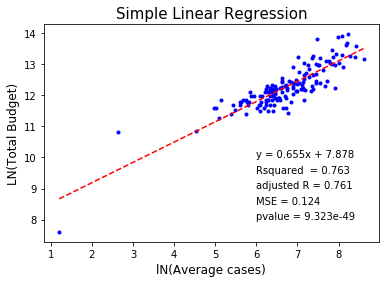

In [43]:
# Use the next line to set figure height and width (experiment to check the scale):
figure_width, figure_height = 7,7

data1 = np.genfromtxt(data_filename1,delimiter = ',')

# If there are errors importing the data, you can also copy the data in as a list.
# e.g. data = [1.95878982, 2.59203983, 1.22704688, ...]

# These lines extract the y-values and the x-values from the data:
x_values = data1[:,0]
y_values = data1[:,1]

# These lines perform the regression procedure:
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

# Now we store all the relevant values:
gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue

# And print them:
print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print('adjusted R=', regression_model_b.rsquared_adj)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)


# This line creates the endpoints of the best-fit line:
x_lobf = [min(x_values),max(x_values)]
y_lobf = [x_lobf[0]*gradient + intercept,x_lobf[1]*gradient + intercept]

# This line creates the figure. 
#plt.figure(figsize=(figure_width,figure_height))

# Uncomment these lines to set the axis limits (otherwise they will be set automatically):
#x_min,x_max = 0,5000000
#y_min,y_max = 0,5000000
#plt.xlim([x_min,x_max])
#plt.ylim([y_min,y_max])

# The next lines create and save the plot:
plt.figure(figsize=(6,4))
plt.plot(x_values,y_values,'b.',x_lobf,y_lobf,'r--')
plt.title('Simple Linear Regression',fontsize=15)
plt.ylabel('LN(Total Budget)',fontsize=12)
plt.xlabel('lN(Average cases)',fontsize=12)
plt.text(6, 10, 'y = 0.655x + 7.878', ha='left', wrap=True)
plt.text(6, 9.5, 'Rsquared  = 0.763', ha='left', wrap=True)
plt.text(6, 9, 'adjusted R = 0.761', ha='left', wrap=True)
plt.text(6, 8.5, 'MSE = 0.124', ha='left', wrap=True)
plt.text(6, 8, 'pvalue = 9.323e-49', ha='left', wrap=True)
plt.savefig(output_filename1)

In [19]:
#import necessary libraries 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd 
data_filename2=pd.read_csv('simpleR2.csv')

In [20]:
data2=pd.DataFrame(data_filename2)

In [21]:
data2

,Average_Cases,Total_Budget
0,6.490,11.842
1,6.454,12.301
2,6.100,11.983
3,6.125,11.989
4,5.814,11.775
5,6.412,12.201
6,8.185,13.630
7,6.769,11.419
8,6.394,11.503
9,6.385,12.211


In [22]:
#fit simple linear regression model
model1 = ols('Total_Budget ~ Average_Cases', data=data2).fit()

#view model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:           Total_Budget   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     483.1
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           9.32e-49
Time:                        00:40:46   Log-Likelihood:                -56.176
No. Observations:                 152   AIC:                             116.4
Df Residuals:                     150   BIC:                             122.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8783      0.202     39.002

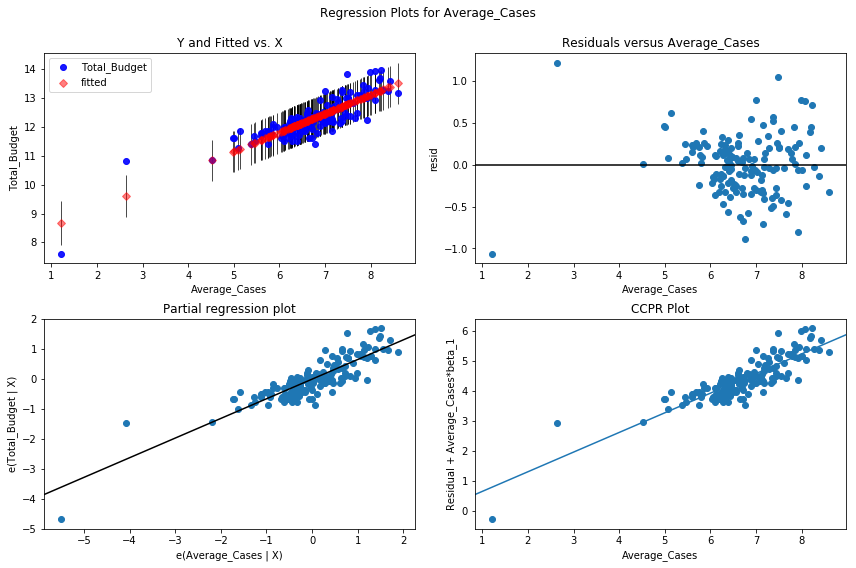

In [24]:
#define figure size
fig = plt.figure(figsize=(12,8))
#produce regression plots
fig = sm.graphics.plot_regress_exog(model1, 'Average_Cases', fig=fig)

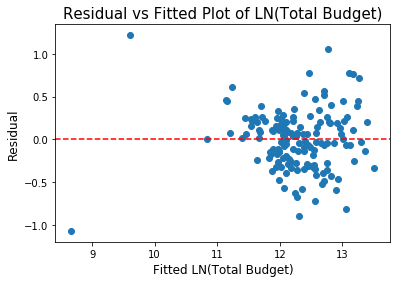

In [30]:
# plot 
plt.figure(figsize=(6,4))
plt.scatter(model1.fittedvalues, model1.resid)
# adding title and labels
plt.xlabel('Fitted LN(Total Budget)',fontsize=12)
plt.ylabel('Residual',fontsize=12)
plt.title('Residual vs Fitted Plot of LN(Total Budget)',fontsize=15)
plt.axhline(0.0, color='r', linestyle='--', label='xxx')
plt.show()

In [9]:
#remove outliers

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     332.7
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           1.38e-39
Time:                        00:57:47   Log-Likelihood:                -45.270
No. Observations:                 149   AIC:                             94.54
Df Residuals:                     147   BIC:                             100.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9479      0.241     32.921      0.0

<Figure size 504x504 with 0 Axes>

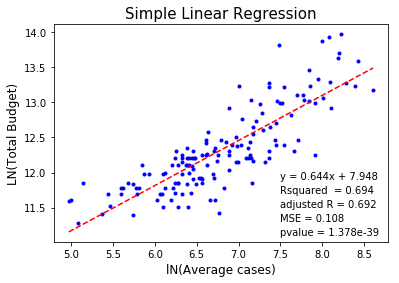

In [44]:
# This program performs a linear regression from data stored in a csv file,
# plots a scatter plot with line of best fit and saves it as a png image.

# You can ignore these two lines:
import matplotlib.pyplot as plt
import statsmodels.api as sms
import numpy as np

# UNCOMMENT THE FOLLOWING IF USING GOOGLE COLAB
#from google.colab import files
#uploaded = files.upload()

import pandas as pd 
data_filename3=pd.read_csv('simpleR3.csv')
# The data file must be two columns of numbers, the x values and y values - no column labels, etc.
# It must be saved as a csv file (e.g. use "Save As" in Excel and choose csv format).
# It must be saved in the same folder as this program.
# See the file population_regression_data.csv for reference.

# In the next line, replace sample_boxplot_data.csv with the filename of your data:
data_filename3 = 'simpleR3.csv'

# In the next line, replace boxplot with the filename you wish to save as:
output_filename3 = 'regression_figure.png'


# Use the next line to set figure height and width (experiment to check the scale):
figure_width, figure_height = 7,7

data3 = np.genfromtxt(data_filename3,delimiter = ',')

# If there are errors importing the data, you can also copy the data in as a list.
# e.g. data = [1.95878982, 2.59203983, 1.22704688, ...]

# These lines extract the y-values and the x-values from the data:
x_values = data3[:,0]
y_values = data3[:,1]

# These lines perform the regression procedure:
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

# Now we store all the relevant values:
gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue

# And print them:
print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print('adjusted R=', regression_model_b.rsquared_adj)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)


# This line creates the endpoints of the best-fit line:
x_lobf = [min(x_values),max(x_values)]
y_lobf = [x_lobf[0]*gradient + intercept,x_lobf[1]*gradient + intercept]

# This line creates the figure. 
plt.figure(figsize=(figure_width,figure_height))

# Uncomment these lines to set the axis limits (otherwise they will be set automatically):
#x_min,x_max = 0,5000000
#y_min,y_max = 0,5000000
#plt.xlim([x_min,x_max])
#plt.ylim([y_min,y_max])

# The next lines create and save the plot:
plt.figure(figsize=(6,4))
plt.plot(x_values,y_values,'b.',x_lobf,y_lobf,'r--')
plt.title('Simple Linear Regression',fontsize=15)
plt.ylabel('LN(Total Budget)',fontsize=12)
plt.xlabel('lN(Average cases)',fontsize=12)
plt.text(7.5, 11.9, 'y = 0.644x + 7.948', ha='left', wrap=True)
plt.text(7.5, 11.7, 'Rsquared  = 0.694', ha='left', wrap=True)
plt.text(7.5, 11.5, 'adjusted R = 0.692', ha='left', wrap=True)
plt.text(7.5, 11.3, 'MSE = 0.108', ha='left', wrap=True)
plt.text(7.5, 11.1, 'pvalue = 1.378e-39', ha='left', wrap=True)
plt.savefig(output_filename3)

                            OLS Regression Results                            
Dep. Variable:           Total_Budget   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     332.7
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           1.38e-39
Time:                        00:48:17   Log-Likelihood:                -45.270
No. Observations:                 149   AIC:                             94.54
Df Residuals:                     147   BIC:                             100.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.9479      0.241     32.921

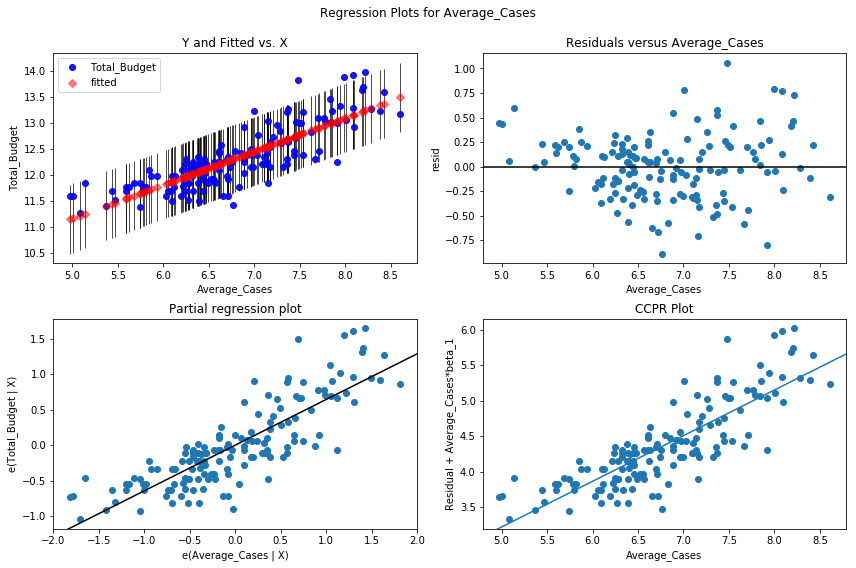

In [29]:
#import necessary libraries 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd 
data_filename4=pd.read_csv('simpleR4.csv')

data4=pd.DataFrame(data_filename4)

#fit simple linear regression model
model2 = ols('Total_Budget ~ Average_Cases', data=data4).fit()

#view model summary
print(model2.summary())
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model2, 'Average_Cases', fig=fig)

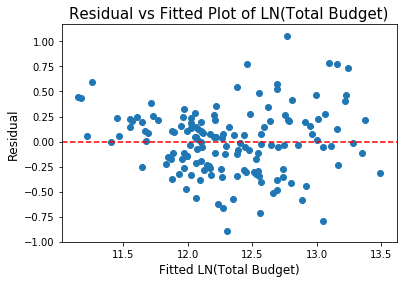

In [31]:
# plot 
plt.figure(figsize=(6,4))
plt.scatter(model2.fittedvalues, model2.resid)
# adding title and labels
plt.xlabel('Fitted LN(Total Budget)',fontsize=12)
plt.ylabel('Residual',fontsize=12)
plt.title('Residual vs Fitted Plot of LN(Total Budget)',fontsize=15)
plt.axhline(0.0, color='r', linestyle='--', label='xxx')
plt.show()